In [1]:
from __future__ import division, print_function
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("savefig", dpi=144)
plt.set_cmap('viridis')

ModuleNotFoundError: No module named 'scipy'

In [ ]:
def roche_C(r, q):
    r = np.asarray(r, dtype=float)
    x = r[...,0]
    y = r[...,1]
    z = r[...,2]
    C = (2/(1+q))/np.sqrt(x**2+y**2+z**2)
    C += (2*q/(1+q))/np.sqrt((x-1)**2+y**2+z**2)
    C += (x-q/(1+q))**2
    C += y**2
    return C

In [ ]:
def l1(q):
    x = scipy.optimize.brent(lambda x: roche_C([x,0,0],q),
                             brack=(q**4,0.5,1-q**4))
    return x, roche_C([x,0,0],q)

In [ ]:
# q = .43/8.9 # J1305-Maxi ratio
q = .7/9
bottom = -2
fsize = 200
fname = "v404 cyngi.dat"
size = 2

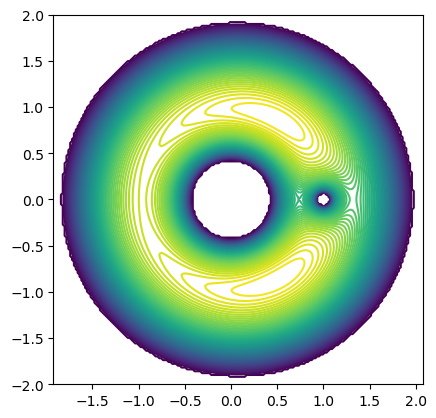

In [ ]:
xs = np.linspace(q-size,q+size,fsize)
ys = np.linspace(-size,size,fsize)
rs = np.zeros((len(xs),len(ys),3))
rs[:,:,0] = xs[:,None]
rs[:,:,1] = ys[None,:]
Cs = roche_C(rs,q).T-l1(q)[1]
Cs /= np.amin(Cs)
Cs = np.maximum(Cs,bottom)


plt.contour(Cs,
            60,
           extent=(xs[0],xs[-1],ys[0],ys[-1]))
plt.gca().set_aspect('equal')
np.savetxt("v404 cyngi.dat", Cs)
#plt.axvline(o1_x+q)
#plt.axvline(o2_x+q)
#plt.axvline(l1_x+q)


In [ ]:
with open("v404 Cyngi.scad", "wt") as f:
    s = """
q = {q};
module roche() {{
    translate([{q},0,0])
        scale([2*{size}/{fsize},2*{size}/{fsize},1])
            surface(file="{fname}", 
                    center=true, 
                    convexity=8);
}}

// Call the module to render the geometry
roche();
    """.format(**globals())
    print(s)
    f.write(s)



q = 0.07777777777777778;
module roche() {
    translate([0.07777777777777778,0,0])
        scale([2*2/200,2*2/200,1])
            surface(file="v404 cyngi.dat", 
                    center=true, 
                    convexity=8);
}

// Call the module to render the geometry
roche();
    


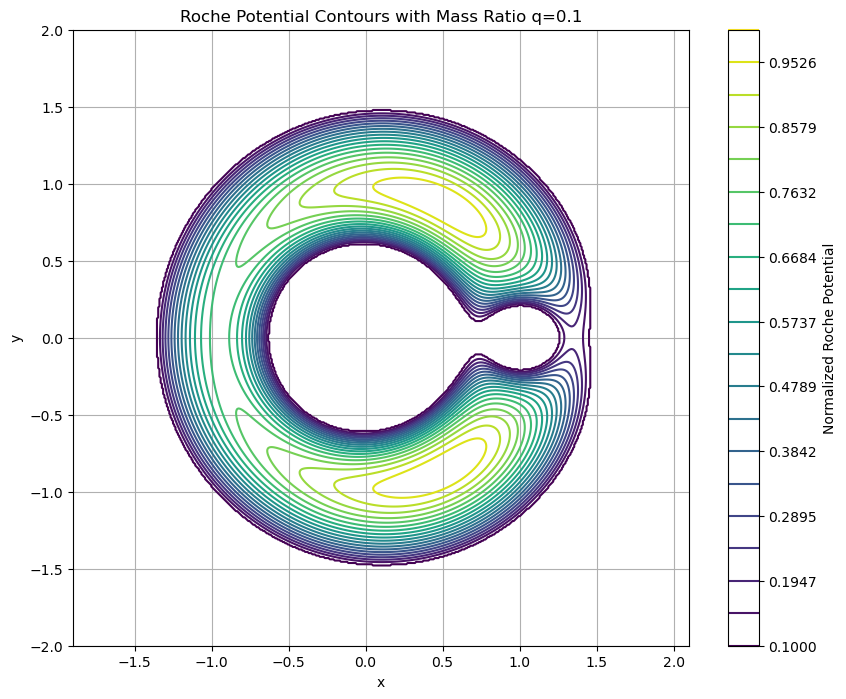

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

def roche_C(r, q):
    r = np.asarray(r, dtype=float)
    x = r[..., 0]
    y = r[..., 1]
    z = r[..., 2]
    C = (2 / (1 + q)) / np.sqrt(x**2 + y**2 + z**2)
    C += (2 * q / (1 + q)) / np.sqrt((x - 1)**2 + y**2 + z**2)
    C += (x - q / (1 + q))**2
    C += y**2
    return C

def l1(q):
    x = scipy.optimize.brent(lambda x: roche_C([x, 0, 0], q),
                             brack=(q**4, 0.5, 1 - q**4))
    return x, roche_C([x, 0, 0], q)

# Parameters
q = 0.1  # Example mass ratio
size = 2  # Range size for the grid
fsize = 500  # Number of points along each axis
bottom = 0.1  # Minimum value for potential to prevent negative values

# Create coordinate grids
xs = np.linspace(q - size, q + size, fsize)
ys = np.linspace(-size, size, fsize)
rs = np.zeros((len(xs), len(ys), 3))
rs[:, :, 0] = xs[:, None]
rs[:, :, 1] = ys[None, :]

# Calculate Roche potential and adjust based on L1
Cs = roche_C(rs, q).T - l1(q)[1]

# Normalize and cap at bottom
Cs /= np.amin(Cs)
Cs = np.maximum(Cs, bottom)

# Calculate contour levels dynamically based on potential values
min_C = np.min(Cs)
max_C = np.max(Cs)
levels = np.linspace(min_C, max_C, 20)  # Dynamic contour levels

# Plotting
plt.figure(figsize=(10, 8))
plt.contour(Cs, levels=levels, extent=(xs[0], xs[-1], ys[0], ys[-1]), cmap='viridis')
plt.colorbar(label='Normalized Roche Potential')
plt.gca().set_aspect('equal')

# Save the potential data to a file
np.savetxt("j1305.dat", Cs)

# Optional vertical lines for additional context
# plt.axvline(o1_x + q, color='r', linestyle='--')
# plt.axvline(o2_x + q, color='g', linestyle='--')
#plt.axvline(l1(q)[0] + q, color='b', linestyle='--')

plt.title(f'Roche Potential Contours with Mass Ratio q={q}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
